# Outliner

###### การตรวจหา outliner
 - Maximum & Minimum values
 - Percentile
 - Mean & standard deviation
 - Inter Qualities Range

###### การจัดการ outliner
 - Trimming
 - Capping

## 1. Max & Min values

In [1]:
import pandas as pd
df = pd.read_excel('dataset.xlsx', sheet_name='outliner')

In [2]:
df

,ID,salary
0,1001,21652
1,1002,20007
2,1003,29464
3,1004,25998
4,1005,21565
5,1006,57801
6,1007,60100
7,1008,29361
8,1009,27654
9,1010,23086


In [24]:
df.describe()

,ID,salary
count,30.000000,30.000000
mean,1015.500000,26609.800000
std,8.803408,9994.181705
min,1001.000000,4780.000000
25%,1008.250000,22031.750000
50%,1015.500000,25420.000000
75%,1022.750000,28215.750000
max,1030.000000,60100.000000


<Axes: >

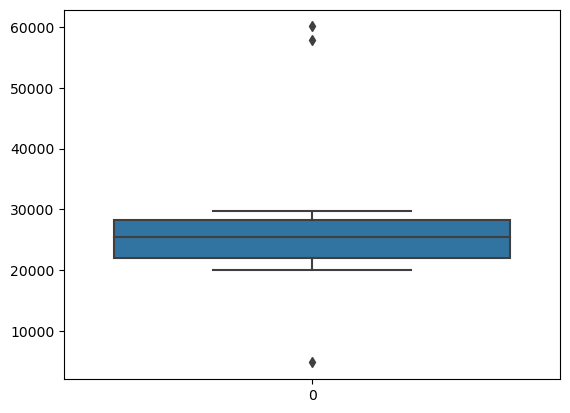

In [25]:
import seaborn as sns
sns.boxplot(df['salary'])

C:\Users\Notebook\AppData\Local\Temp\ipykernel_19876\118205992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary'])


<Axes: xlabel='salary', ylabel='Density'>

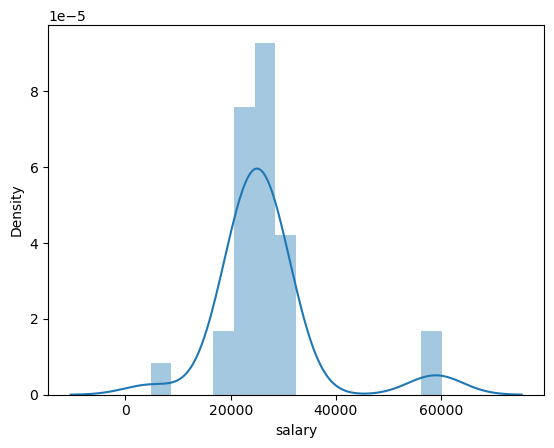

In [26]:
sns.distplot(df['salary'])

### Find boundary for outliner

In [27]:
import numpy as np
lower_limit = np.sort(df['salary'].values)[1] #ถัดจากตัวแรก
upper_limit = np.sort(df['salary'].values)[-2] #รองจากตัวสุดท้าย

In [7]:
# 0 1 2 3 ... 199 200 201 202

In [28]:
lower_limit

20007

In [29]:
upper_limit

57801

### Trimming the outliner values

In [40]:
df_trim = df[(df['salary'] <= upper_limit) & (df['salary'] >= lower_limit)]

In [41]:
df_trim.describe()

,ID,salary
count,28.000000,28.000000
mean,1015.321429,26193.357143
std,8.589630,6921.883752
min,1001.000000,20007.000000
25%,1008.750000,22123.250000
50%,1015.500000,25420.000000
75%,1022.250000,27841.250000
max,1030.000000,57801.000000


<Axes: >

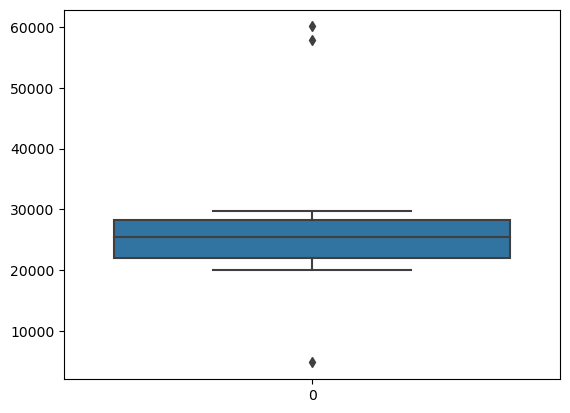

In [42]:
sns.boxplot(df['salary'])

<Axes: >

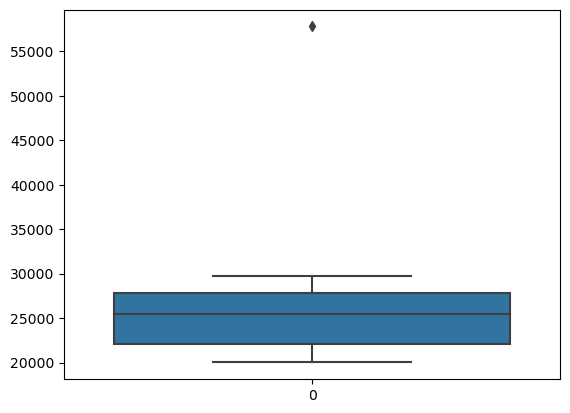

In [43]:
sns.boxplot(df_trim['salary'])

C:\Users\Notebook\AppData\Local\Temp\ipykernel_19876\1904338244.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trim['salary'])


<Axes: xlabel='salary', ylabel='Density'>

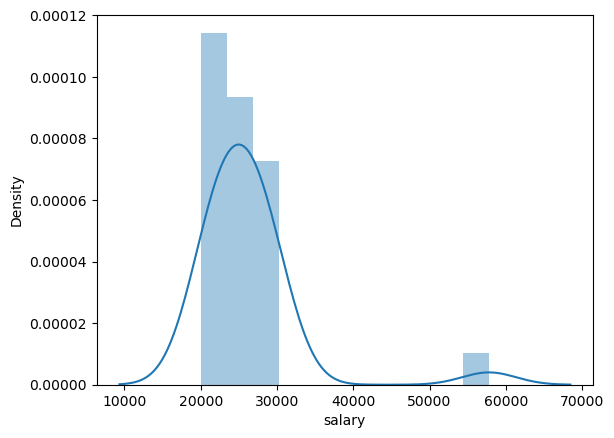

In [44]:
sns.distplot(df_trim['salary'])

### Clipping the outliner values

In [45]:
df_clip = df.copy()

In [46]:
df_clip['salary'] = df['salary'].replace( df['salary'].min() , lower_limit)

In [47]:
df_clip.describe()

,ID,salary
count,30.000000,30.000000
mean,1015.500000,27117.366667
std,8.803408,9202.612922
min,1001.000000,20007.000000
25%,1008.250000,22031.750000
50%,1015.500000,25420.000000
75%,1022.750000,28215.750000
max,1030.000000,60100.000000


In [48]:
df_clip['salary'] = df_clip['salary'].replace( df_clip['salary'].max() , upper_limit)

In [49]:
df_clip.describe()

,ID,salary
count,30.000000,30.000000
mean,1015.500000,27040.733333
std,8.803408,8923.833887
min,1001.000000,20007.000000
25%,1008.250000,22031.750000
50%,1015.500000,25420.000000
75%,1022.750000,28215.750000
max,1030.000000,57801.000000


<Axes: >

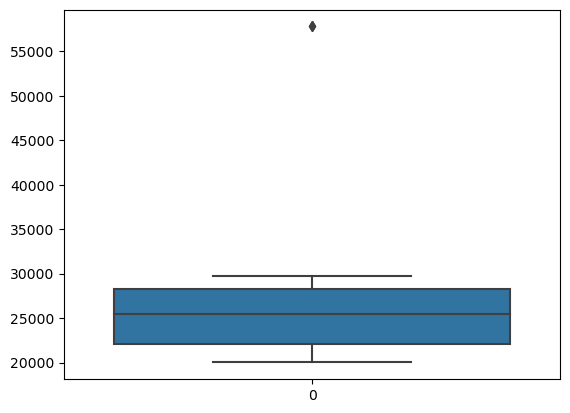

In [50]:
sns.boxplot(df_clip['salary'])

C:\Users\Notebook\AppData\Local\Temp\ipykernel_19876\2824286914.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clip['salary'])


<Axes: xlabel='salary', ylabel='Density'>

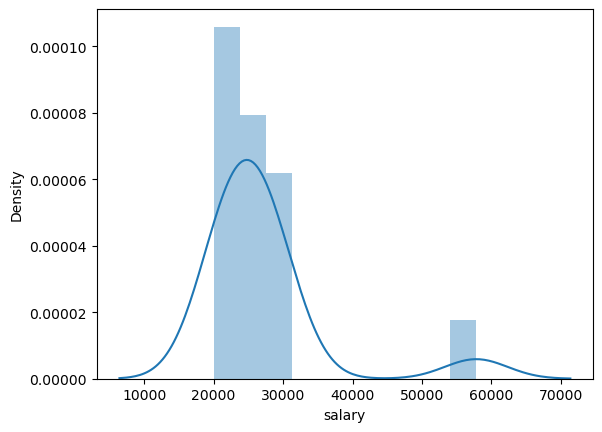

In [51]:
sns.distplot(df_clip['salary'])

## 2. Using percentile

In [52]:
import pandas as pd
df = pd.read_excel('dataset.xlsx', sheet_name='outliner')

In [53]:
df

,ID,salary
0,1001,21652
1,1002,20007
2,1003,29464
3,1004,25998
4,1005,21565
5,1006,57801
6,1007,60100
7,1008,29361
8,1009,27654
9,1010,23086


In [54]:
df.describe()

,ID,salary
count,30.000000,30.000000
mean,1015.500000,26609.800000
std,8.803408,9994.181705
min,1001.000000,4780.000000
25%,1008.250000,22031.750000
50%,1015.500000,25420.000000
75%,1022.750000,28215.750000
max,1030.000000,60100.000000


<Axes: >

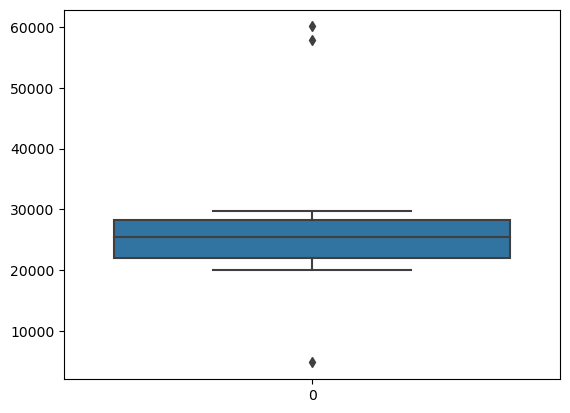

In [55]:
import seaborn as sns
sns.boxplot(df['salary'])

C:\Users\Notebook\AppData\Local\Temp\ipykernel_19876\118205992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary'])


<Axes: xlabel='salary', ylabel='Density'>

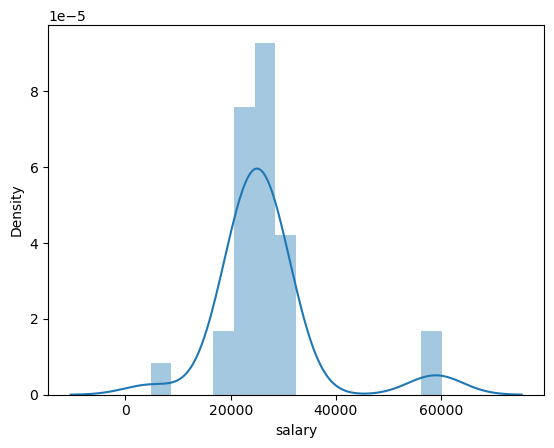

In [56]:
sns.distplot(df['salary'])

### Find boundary for outliner

In [57]:
upper_limit = df['salary'].quantile(0.99)
lower_limit = df['salary'].quantile(0.01)

In [58]:
upper_limit

59433.29

In [59]:
lower_limit

9195.83

### Trimming the outliner values

In [60]:
df_trim = df[(df['salary'] <= upper_limit) & (df['salary'] >= lower_limit)]

In [61]:
df_trim.describe()

,ID,salary
count,28.000000,28.000000
mean,1015.321429,26193.357143
std,8.589630,6921.883752
min,1001.000000,20007.000000
25%,1008.750000,22123.250000
50%,1015.500000,25420.000000
75%,1022.250000,27841.250000
max,1030.000000,57801.000000


<Axes: >

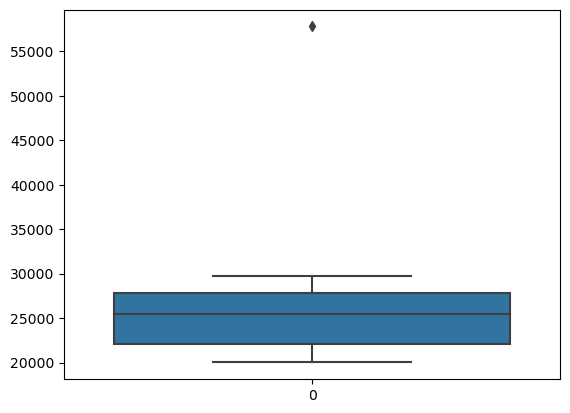

In [62]:
sns.boxplot(df_trim['salary'])

C:\Users\Notebook\AppData\Local\Temp\ipykernel_19876\1904338244.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trim['salary'])


<Axes: xlabel='salary', ylabel='Density'>

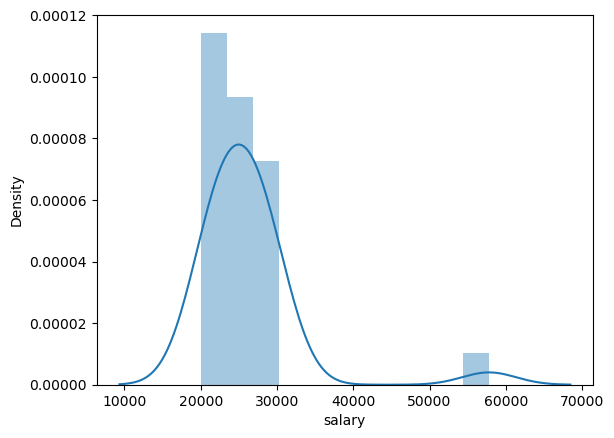

In [63]:
sns.distplot(df_trim['salary'])

### Clipping the outliner values

In [64]:
df_clip = df.copy()

In [65]:
df_clip['salary'] = df['salary'].replace( df['salary'].loc[df['salary'] < lower_limit] , lower_limit)

ValueError: Series.replace cannot use dict-like to_replace and non-None value

In [ ]:
df_clip.describe()

In [ ]:
df_clip['salary'] = df_clip['salary'].replace( df_clip['salary'].loc[df_clip['salary'] > upper_limit] , upper_limit)

In [ ]:
df_clip.describe()

In [ ]:
sns.boxplot(df['salary'])

In [ ]:
sns.boxplot(df_clip['salary'])

C:\Users\Notebook\AppData\Local\Temp\ipykernel_19876\2824286914.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clip['salary'])


<Axes: xlabel='salary', ylabel='Density'>

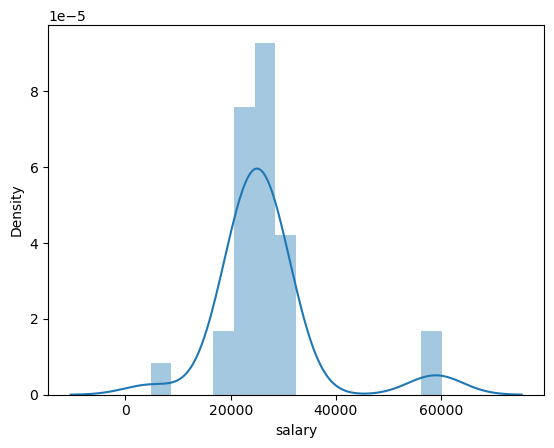

In [66]:
sns.distplot(df_clip['salary'])

### Change the boundary to the 10th percentile

In [67]:
upper_limit = df['salary'].quantile(0.90)
lower_limit = df['salary'].quantile(0.10)

In [68]:
upper_limit

29681.4

In [69]:
lower_limit

21046.3

In [70]:
df_trim = df[(df['salary'] <= upper_limit) & (df['salary'] >= lower_limit)]

In [71]:
df_trim.describe()

,ID,salary
count,24.000000,24.00000
mean,1015.250000,25237.12500
std,7.853274,2839.35947
min,1001.000000,21144.00000
25%,1009.750000,22799.75000
50%,1015.500000,25420.00000
75%,1021.250000,26998.50000
max,1028.000000,29674.00000


<Axes: >

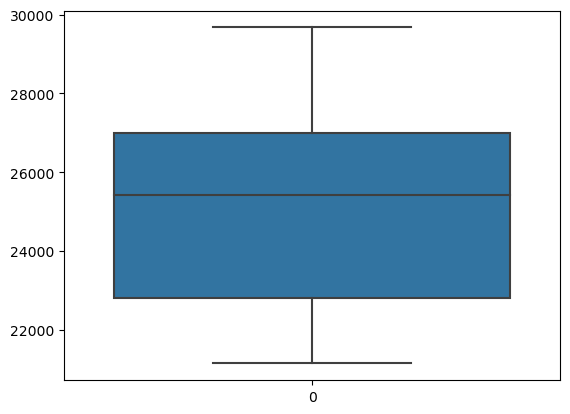

In [72]:
sns.boxplot(df_trim['salary'])

C:\Users\Notebook\AppData\Local\Temp\ipykernel_19876\1904338244.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trim['salary'])


<Axes: xlabel='salary', ylabel='Density'>

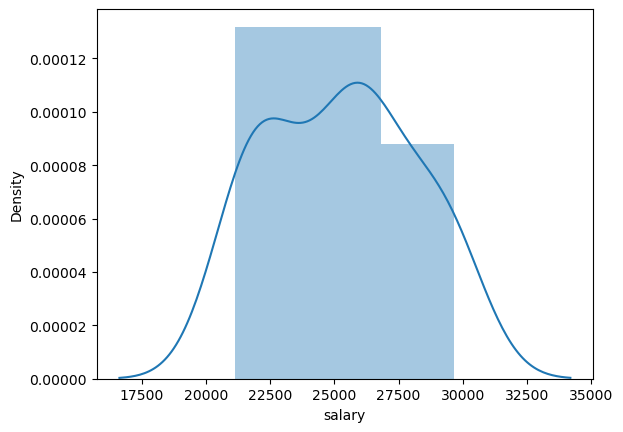

In [73]:
sns.distplot(df_trim['salary'])

## 3. Using the Inter-Quantile Range (IQR)

In [74]:
import pandas as pd
df = pd.read_excel('dataset.xlsx', sheet_name='outliner')

In [75]:
df.describe()

,ID,salary
count,30.000000,30.000000
mean,1015.500000,26609.800000
std,8.803408,9994.181705
min,1001.000000,4780.000000
25%,1008.250000,22031.750000
50%,1015.500000,25420.000000
75%,1022.750000,28215.750000
max,1030.000000,60100.000000


<Axes: >

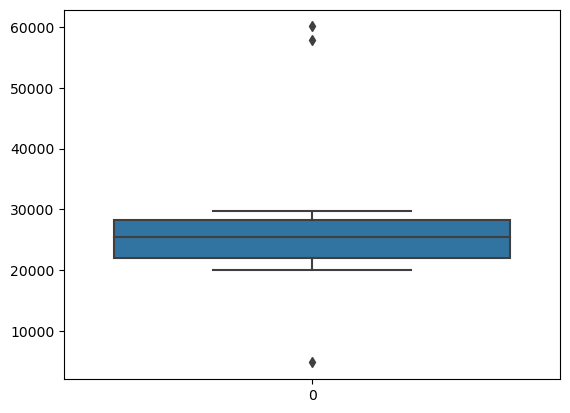

In [76]:
import seaborn as sns
sns.boxplot(df['salary'])

C:\Users\Notebook\AppData\Local\Temp\ipykernel_19876\118205992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary'])


<Axes: xlabel='salary', ylabel='Density'>

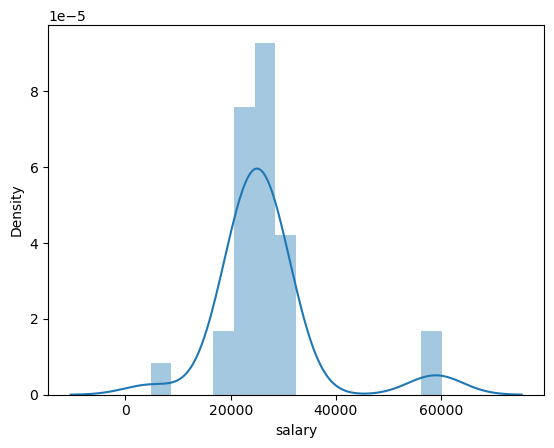

In [77]:
sns.distplot(df['salary'])

### Find boundary for outliner

In [78]:
q1 = df['salary'].quantile(0.25)
q3 = df['salary'].quantile(0.75)
iqr = q3-q1

In [79]:
upper_limit = q3 + ( 1.5 * iqr )
lower_limit = q1 - ( 1.5 * iqr )

In [80]:
upper_limit

37491.75

In [81]:
lower_limit

12755.75

### Trimming the outliner values

In [82]:
df_trim = df[(df['salary'] <= upper_limit) & (df['salary'] >= lower_limit)]

In [83]:
df_trim.describe()

,ID,salary
count,27.000000,27.000000
mean,1015.666667,25022.703704
std,8.553002,3147.600635
min,1001.000000,20007.000000
25%,1009.500000,22077.500000
50%,1016.000000,25366.000000
75%,1022.500000,27217.000000
max,1030.000000,29748.000000


<Axes: >

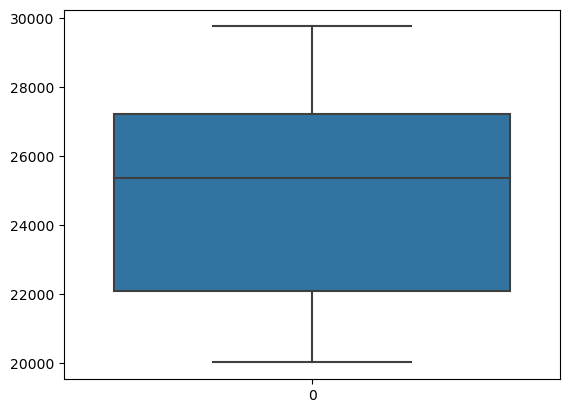

In [84]:
sns.boxplot(df_trim['salary'])

C:\Users\Notebook\AppData\Local\Temp\ipykernel_19876\1904338244.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trim['salary'])


<Axes: xlabel='salary', ylabel='Density'>

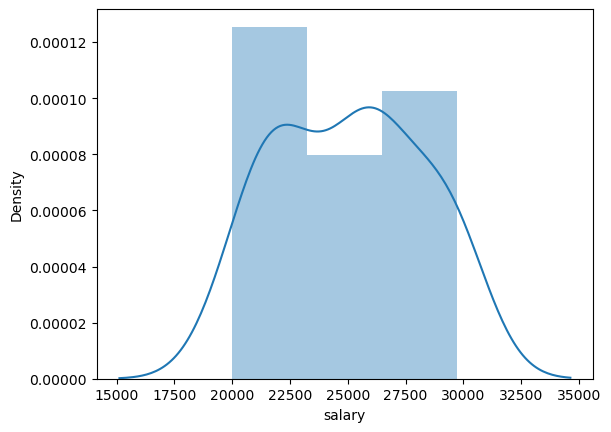

In [85]:
sns.distplot(df_trim['salary'])

### Another function for clipping the outliner values

In [93]:
import numpy as np
df_clip['salary'] = np.where( df['salary'] >= upper_limit,
                                  upper_limit,
                                  np.where(df['salary'] <= lower_limit,
                                               lower_limit,
                                               df['salary'] ) )

In [94]:
df_clip.describe()

,ID,salary
count,30.000000,30.000000
mean,1015.500000,25445.075000
std,8.803408,4960.786202
min,1001.000000,12755.750000
25%,1008.250000,22031.750000
50%,1015.500000,25420.000000
75%,1022.750000,28215.750000
max,1030.000000,37491.750000


<Axes: >

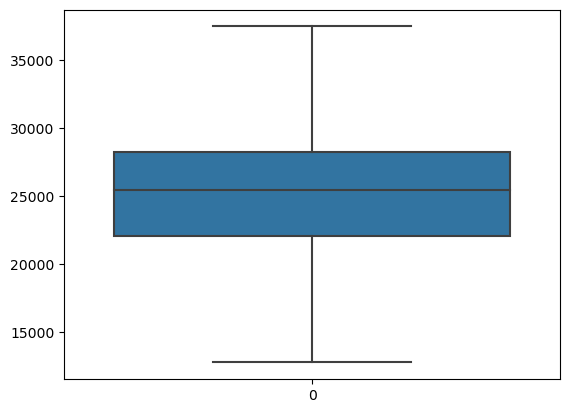

In [95]:
sns.boxplot(df_clip['salary'])

C:\Users\Notebook\AppData\Local\Temp\ipykernel_19876\2824286914.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clip['salary'])


<Axes: xlabel='salary', ylabel='Density'>

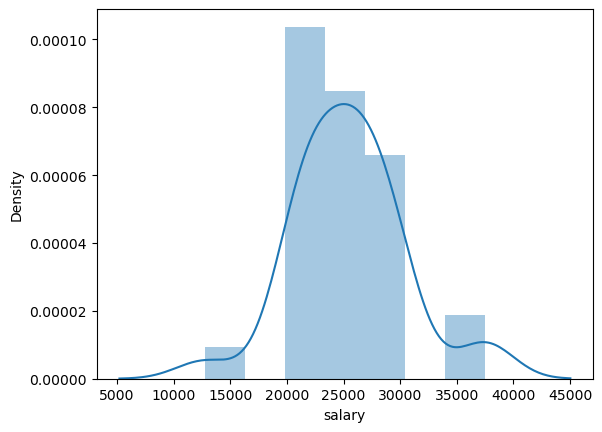

In [96]:
sns.distplot(df_clip['salary'])